In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_split=0.1, batch_size=64)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 71s 98ms/step - accuracy: 0.3083 - loss: 1.8527 - val_accuracy: 0.5152 - val_loss: 1.3632
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 72s 84ms/step - accuracy: 0.5163 - loss: 1.3397 - val_accuracy: 0.5596 - val_loss: 1.2233
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.5817 - loss: 1.1890 - val_accuracy: 0.6138 - val_loss: 1.0971
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.6227 - loss: 1.0816 - val_accuracy: 0.6388 - val_loss: 1.0421
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6500 - loss: 0.9907 - val_accuracy: 0.6682 - val_loss: 0.9675
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.6808 - loss: 0.9173 - val_accuracy: 0.6802 - val_loss: 0.9269
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6928 - loss: 0.8719 - val_accuracy: 0.6768 - val_loss: 0.9467
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.7121 - loss: 0.8226 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.6834 - loss: 0.9108

Test accuracy: 0.6834


In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.81      0.81      0.81      1000
           2       0.53      0.62      0.57      1000
           3       0.52      0.48      0.50      1000
           4       0.66      0.57      0.61      1000
           5       0.64      0.53      0.58      1000
           6       0.76      0.74      0.75      1000
           7       0.78      0.70      0.74      1000
           8       0.74      0.85      0.79      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000


Confusion Matrix:
[[763  16  32  11  10   5   6  10 114  33]
 [ 32 808   6   6   5   2   9   2  38  92]
 [ 99   6 621  58  77  42  41  26  18  12]
 [ 44  15 109 477  55 133  

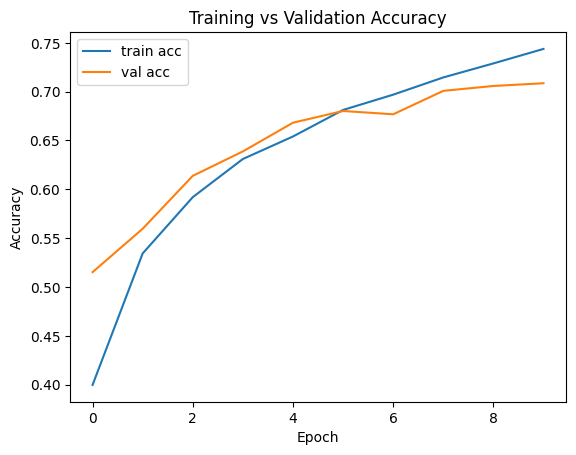

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
